___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (15,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import pickle

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from imblearn.ensemble import EasyEnsembleClassifier,BalancedRandomForestClassifier
#from xgboost import XGBClassifier
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler,LabelEncoder

#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,average_precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve,precision_recall_curve,average_precision_score 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [15]:
from termcolor import colored
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',colored('-'*79, 'red', attrs=['bold']), sep='')
    if feature==[] and collinear==[]:
        print('There is no Multicolinearity')
            
                    
def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')      
def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))        

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df0=pd.read_csv("HR_Dataset.csv")
df=df0.copy()
df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [6]:
df.columns    

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments_', 'salary'],
      dtype='object')

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [223]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments_,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [80]:
df.info()##Excellent there is no missing number at first glance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments_           14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [81]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [82]:
df.duplicated().sum()

3008

In [83]:
multicolinearity_control(df)

There is no Multicolinearity


In [84]:
duplicate_values(df)

Duplicate check...
3008Duplicates were dropped!
-------------------------------------------------------------------------------


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   departments_           11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [86]:
for i in df.columns:
    first_look(i)
    print('***********************************************')

column name    :  satisfaction_level
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  92
0.740    214
0.100    203
0.730    201
0.500    200
0.840    199
        ... 
0.250     29
0.260     28
0.120     26
0.280     24
0.270     23
Name: satisfaction_level, Length: 92, dtype: int64
***********************************************
column name    :  last_evaluation
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  65
0.550    281
0.500    269
0.510    264
0.570    258
0.540    252
        ... 
0.390     45
0.430     44
0.380     42
0.440     35
0.360     19
Name: last_evaluation, Length: 65, dtype: int64
***********************************************
column name    :  number_project
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64
***************************

In [87]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667,0.716,3.787,198.943,3.262,0.174,0.019
1,0.440,0.722,3.883,208.162,3.881,0.053,0.004


## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

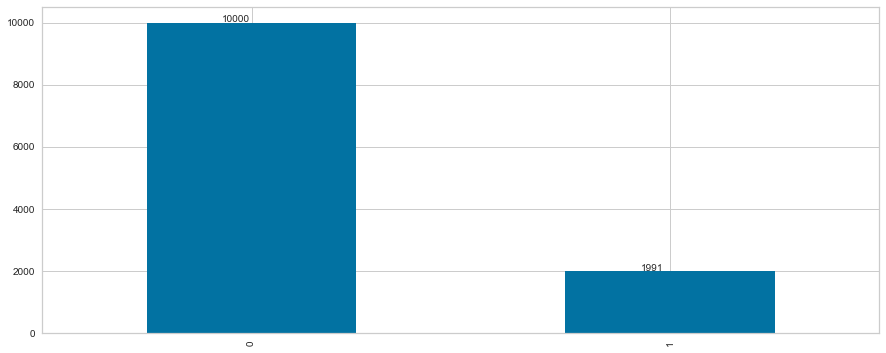

In [88]:
plt.figure(figsize=(15,6))
ax=df.left.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.18, p.get_height()+23));

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

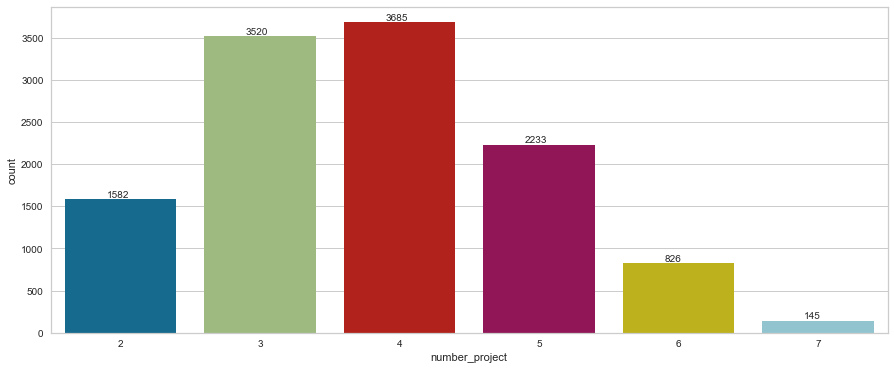

In [89]:
plt.figure(figsize=(15,6))
ax=sns.countplot('number_project',data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+23));

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


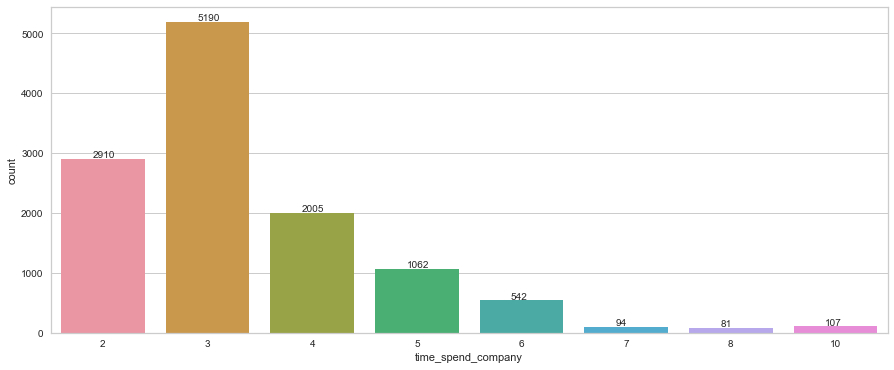

In [90]:
plt.figure(figsize=(15,6))
ax=sns.countplot('time_spend_company',data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+23));

### Subplots of Features

You can use the methods of the matplotlib.

In [91]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments_', 'salary'],
      dtype='object')

In [94]:
categoric=['number_project','time_spend_company', 'work_accident','departments_', 'salary','promotion_last_5years']

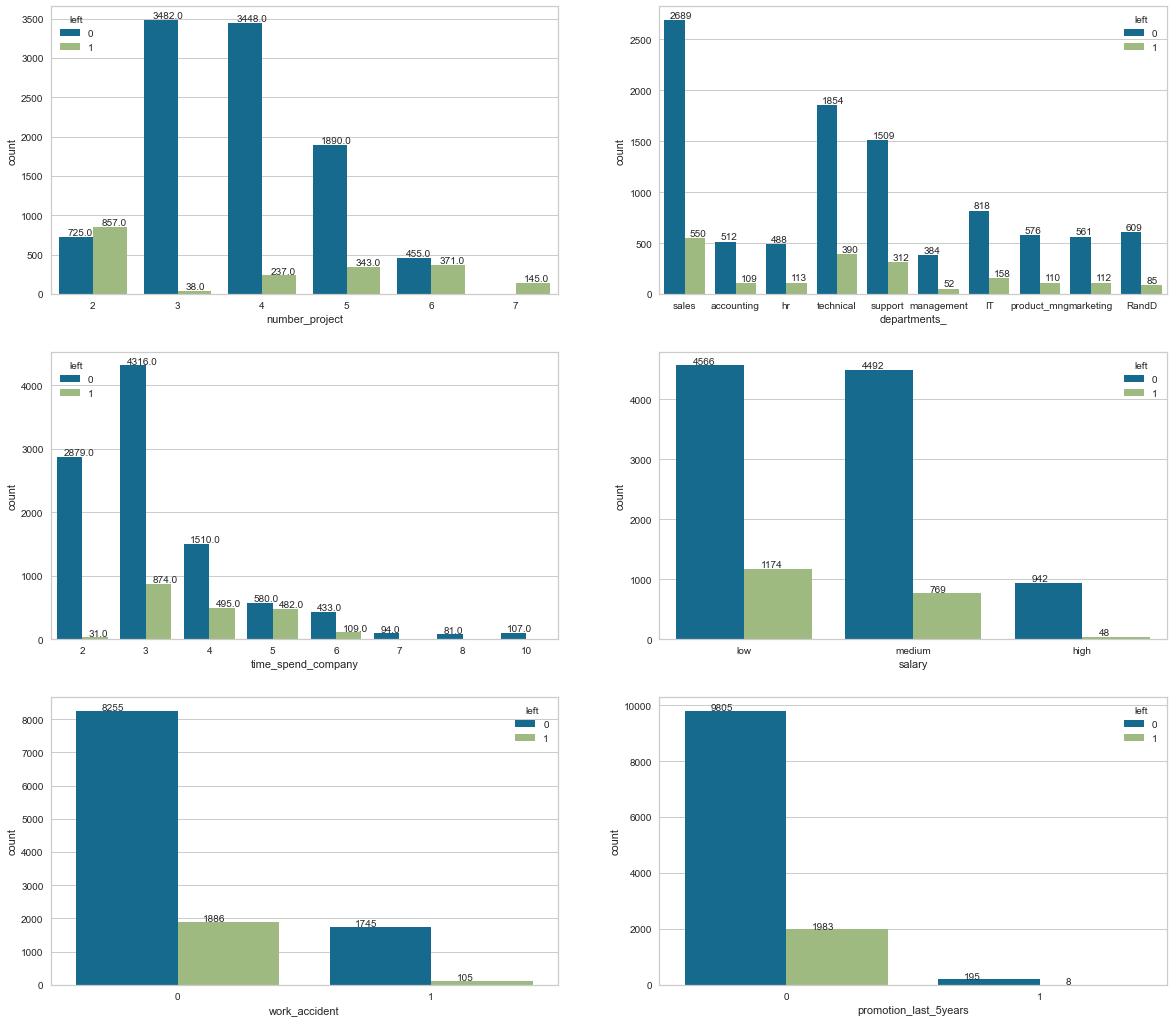

In [95]:
fig, ax = plt.subplots(nrows =3 ,ncols=2, figsize = (20,18)) 
r,c=0,0
for i in range(len(categoric)):
    if r<3:
        sns.countplot(df[categoric[i]],data=df,hue=df['left'],ax=ax[r,c])
        for p in ax[r,c].patches:
            ax[r,c].annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+23));
        r+=1 
    else: 
        r=0
        c+=1
        sns.countplot(df[categoric[i]],data=df,hue=df['left'],ax=ax[r,c])
        for p in ax[r,c].patches:
            ax[r,c].annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+23));
            
        r+=1
   

    


## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [240]:
X=df.drop('left',1)
y=df['left']

In [241]:
le_dep=LabelEncoder()
le_sal=LabelEncoder()
X.departments_=le_dep.fit_transform(X.departments_)
X.salary=le_sal.fit_transform(X.salary)

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [97]:
#df.departments_.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [98]:
#df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [100]:
#le=LabelEncoder()
#df.departments_=le.fit_transform(df.departments_)
#df.salary=le.fit_transform(df.salary)

In [102]:
#X=df.drop('left',1)
#y=df['left']

In [248]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 0.77777778,
        0.5       ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.77777778,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.77777778,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 0.88888889,
        0.5       ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 0.88888889,
        0.5       ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 0.88888889,
        0.5       ]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [121]:
X_clus=scaler.fit_transform(df[['satisfaction_level','last_evaluation']]) 
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X_clus)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

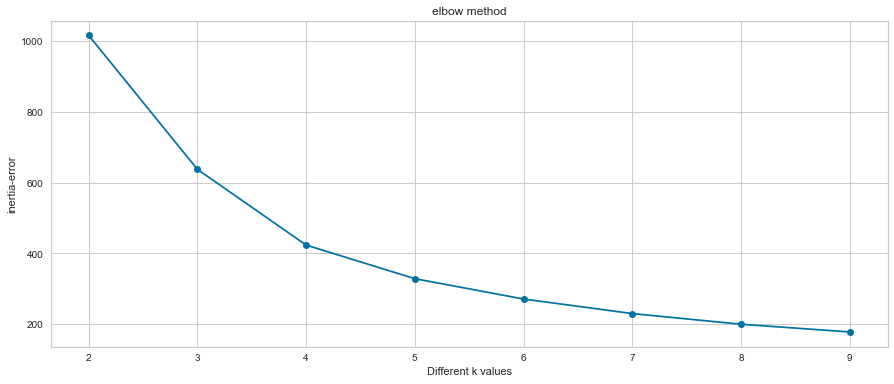

In [122]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

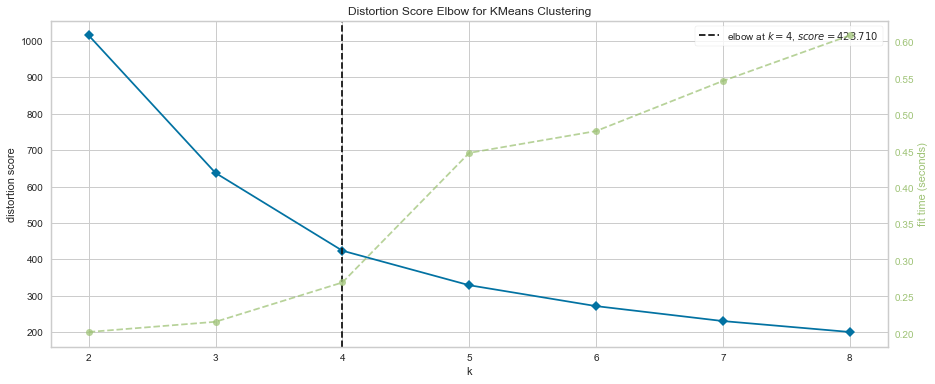

In [123]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_clus)        # Fit the data to the visualizer
visualizer.show();

In [124]:
range_n_clusters = range(2,12)  ## düşük inertia yüsek silhoutte score istenen
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_clus)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_clus, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg},the inertia is : {kmeans.inertia_}")

For n_clusters=2, the silhouette score is 0.37686491148018575,the inertia is : 1015.0292185184036
For n_clusters=3, the silhouette score is 0.418207449814711,the inertia is : 637.2216084873329
For n_clusters=4, the silhouette score is 0.4249757219934124,the inertia is : 423.71215384879844
For n_clusters=5, the silhouette score is 0.4162868632036711,the inertia is : 328.84826067438007
For n_clusters=6, the silhouette score is 0.40427407733130666,the inertia is : 271.4730563606078
For n_clusters=7, the silhouette score is 0.3946203039812219,the inertia is : 230.4255884758878
For n_clusters=8, the silhouette score is 0.3792564379561502,the inertia is : 200.40430558560087
For n_clusters=9, the silhouette score is 0.38253653970918966,the inertia is : 178.5183124844429
For n_clusters=10, the silhouette score is 0.3821776080396387,the inertia is : 163.90295286879493
For n_clusters=11, the silhouette score is 0.37866510332768377,the inertia is : 150.0143890091082


In [184]:
model = KMeans(n_clusters =2, random_state=42)
model.fit_predict(X)
pred_clusters = model.labels_
df["predicted_left"] = pred_clusters
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments_,salary,predicted_clusters,predicted_left
0,0.380,0.530,2,157,3,0,1,0,7,1,0,0
1,0.800,0.860,5,262,6,0,1,0,7,2,0,0
2,0.110,0.880,7,272,4,0,1,0,7,2,0,0
3,0.720,0.870,5,223,5,0,1,0,7,1,0,0
4,0.370,0.520,2,159,3,0,1,0,7,1,0,0


In [185]:
ct = pd.crosstab(df.predicted_left, df.left)
ct

left,0,1
predicted_left,,
0,8255,1886
1,1745,105


## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify =y)

### #Gradient Boosting Classifier

#### Model Building

In [186]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
grad_acc = accuracy_score(y_test, y_pred)
grad_recall = recall_score(y_test, y_pred)
grad_f1=f1_score(y_test, y_pred)

In [187]:
print('Test prediction')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Test prediction
[[2974   27]
 [  42  555]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.95      0.93      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598



In [188]:
print('Train prediction')
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Train prediction
[[6959   40]
 [ 102 1292]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



In [189]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} 

In [190]:
gb_model = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [191]:
y_pred = grid.predict(X_test)
y_train_pred = grid.predict(X_train)
grad_tuned_acc = accuracy_score(y_test, y_pred)
grad_tuned_recall = recall_score(y_test, y_pred)
grad_tuned_f1=f1_score(y_test, y_pred)

In [192]:
print('Test prediction')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Train prediction')
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Test prediction
[[2971   30]
 [  42  555]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.95      0.93      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598

Train prediction
[[6977   22]
 [  84 1310]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.98      0.94      0.96      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



In [193]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=300, random_state=42, subsample=1)

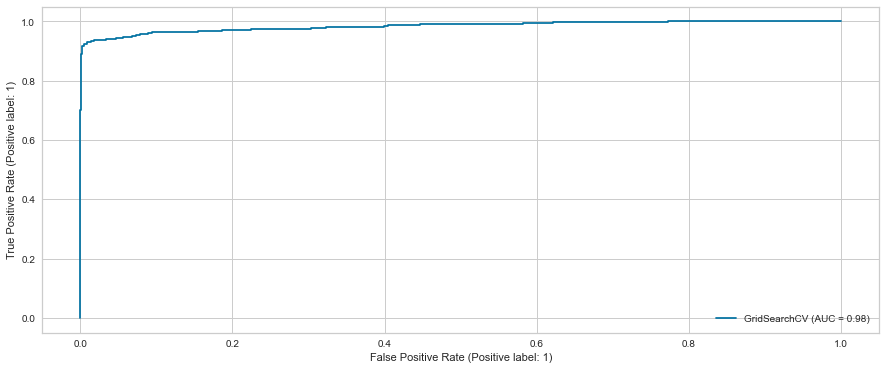

In [194]:
plot_roc_curve(grid, X_test, y_test);

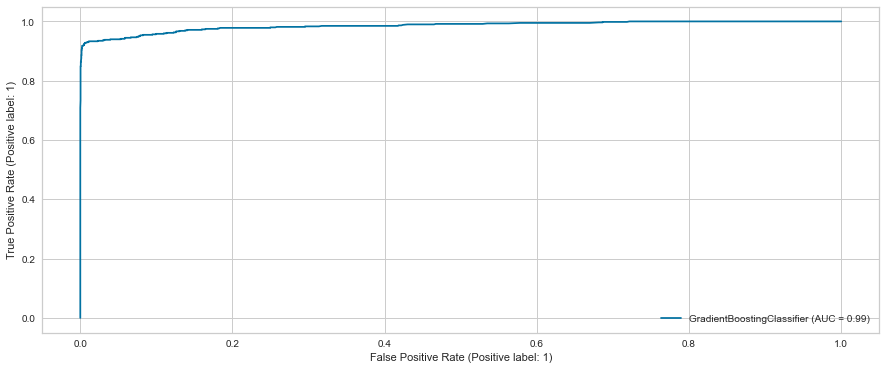

In [195]:
plot_roc_curve(model, X_test, y_test);

In [196]:
model = GradientBoostingClassifier()

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.803,0.012,0.986,0.971,0.943,0.957,0.993
2,0.758,0.012,0.985,0.977,0.929,0.952,0.992
3,0.813,0.012,0.973,0.953,0.879,0.914,0.980
4,0.787,0.012,0.976,0.928,0.928,0.928,0.989
5,0.773,0.011,0.987,0.985,0.935,0.959,0.987
6,0.776,0.018,0.981,0.962,0.921,0.941,0.984
7,0.763,0.011,0.977,0.941,0.921,0.931,0.989
8,0.752,0.011,0.987,0.971,0.950,0.960,0.988
9,0.753,0.010,0.986,0.964,0.950,0.957,0.993
10,0.895,0.012,0.979,0.962,0.907,0.934,0.973


#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [197]:
#pip install yellowbrick

#### Prediction

### #KNeighbors Classifier

#### Model Building

In [198]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

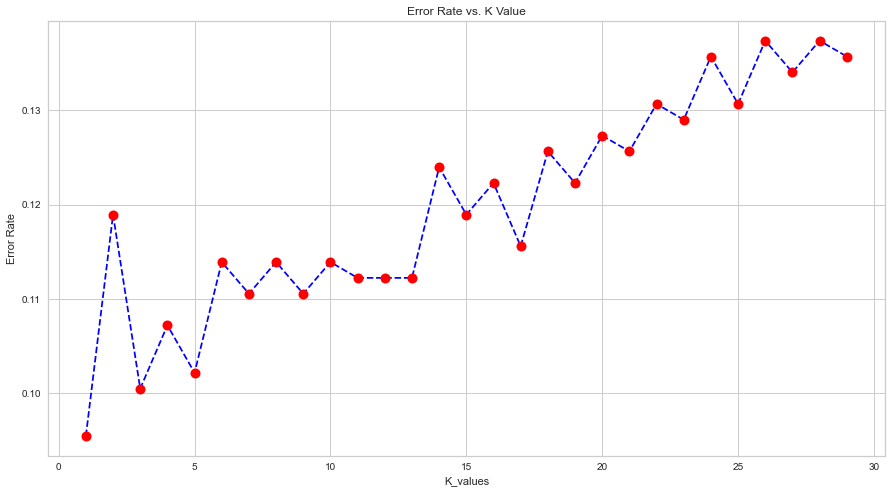

In [199]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')


In [200]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1=f1_score(y_test, y_pred)
print('Test prediction')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Train prediction')
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


Test prediction
[[2914   87]
 [  60  537]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3001
           1       0.86      0.90      0.88       597

    accuracy                           0.96      3598
   macro avg       0.92      0.94      0.93      3598
weighted avg       0.96      0.96      0.96      3598

Train prediction
[[6977   22]
 [  84 1310]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.98      0.94      0.96      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



In [201]:
model = KNeighborsClassifier(n_neighbors = 3)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)
print("--------------------")
print(df_scores.mean()[2:])

    fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.040       0.092          0.970           0.902        0.921    0.912
2      0.038       0.090          0.958           0.852        0.907    0.879
3      0.039       0.091          0.958           0.901        0.843    0.871
4      0.041       0.089          0.955           0.844        0.892    0.867
5      0.038       0.102          0.962           0.874        0.899    0.887
6      0.040       0.088          0.957           0.860        0.885    0.872
7      0.038       0.089          0.958           0.866        0.885    0.875
8      0.041       0.089          0.955           0.853        0.878    0.865
9      0.038       0.088          0.961           0.858        0.914    0.885
10     0.040       0.088          0.955           0.864        0.864    0.864
--------------------
test_accuracy    0.959
test_precision   0.867
test_recall      0.889
test_f1          0.878
dtype: float64


#### Evaluating Model Performance

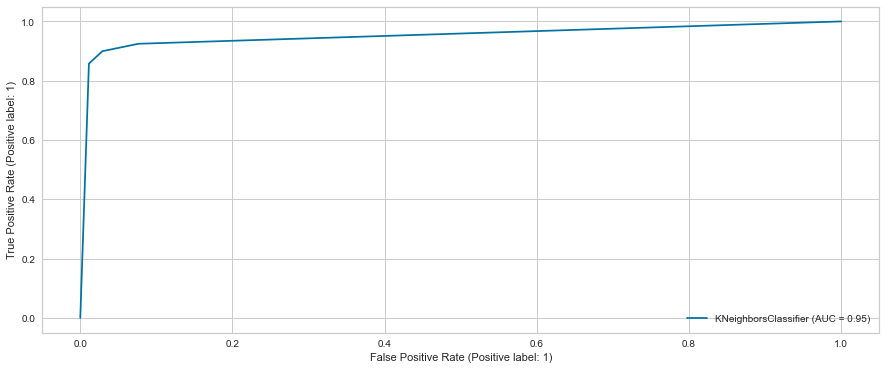

In [202]:
plot_roc_curve(knn_model, X_test, y_test);

#### Prediction

### #Random Forest Classifier

#### Model Building

In [203]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1=f1_score(y_test, y_pred)
print('Test prediction')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Train prediction')
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


Test prediction
[[2996    5]
 [  48  549]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.92      0.95       597

    accuracy                           0.99      3598
   macro avg       0.99      0.96      0.97      3598
weighted avg       0.99      0.99      0.99      3598

Train prediction
[[6977   22]
 [  84 1310]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.98      0.94      0.96      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



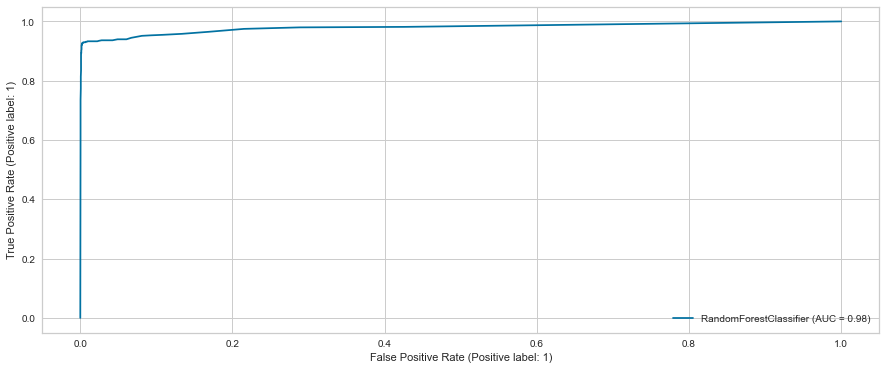

In [204]:
plot_roc_curve(rf_model, X_test, y_test);

In [205]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores)

    fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.728       0.033          0.985           0.985        0.921    0.952
2      0.749       0.036          0.987           1.000        0.921    0.959
3      0.708       0.033          0.975           0.984        0.864    0.920
4      0.734       0.034          0.981           0.969        0.914    0.941
5      0.706       0.032          0.985           0.992        0.914    0.951
6      0.705       0.033          0.982           0.992        0.899    0.943
7      0.705       0.032          0.983           0.984        0.914    0.948
8      0.695       0.033          0.981           0.977        0.906    0.940
9      0.715       0.032          0.986           0.992        0.921    0.955
10     0.693       0.034          0.980           0.984        0.893    0.936


#### Evaluating Model Performance

In [206]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [207]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [208]:
y_pred = rf_grid_model.predict(X_test)
y_train_pred = rf_grid_model.predict(X_train)
rf_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_recall = recall_score(y_test, y_pred)
rf_tuned_f1=f1_score(y_test, y_pred)

In [209]:
print('Test prediction')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print('Train prediction')
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Test prediction
[[2781  220]
 [  30  567]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3001
           1       0.72      0.95      0.82       597

    accuracy                           0.93      3598
   macro avg       0.85      0.94      0.89      3598
weighted avg       0.94      0.93      0.93      3598

Train prediction
[[6486  513]
 [  91 1303]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6999
           1       0.72      0.93      0.81      1394

    accuracy                           0.93      8393
   macro avg       0.85      0.93      0.88      8393
weighted avg       0.94      0.93      0.93      8393



#### Compare

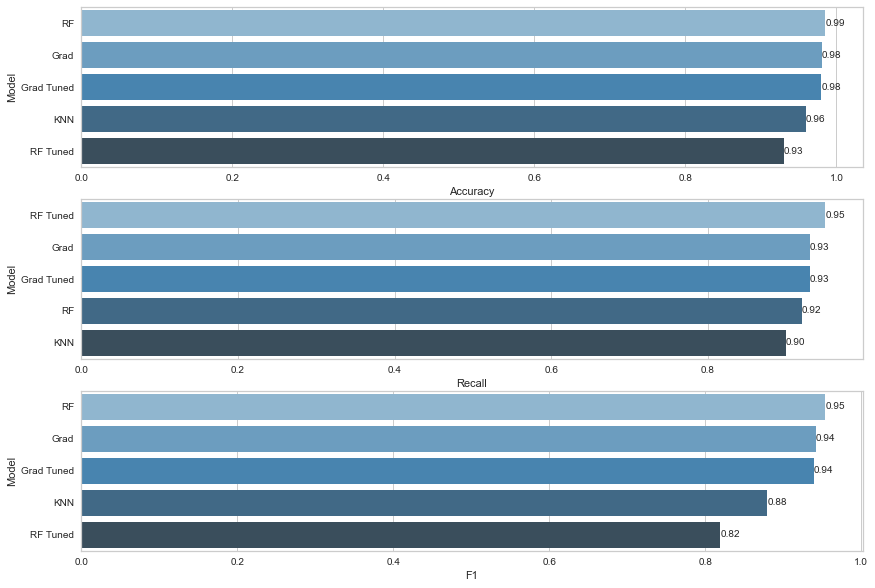

In [211]:
compare = pd.DataFrame({"Model": ["KNN","Grad", "Grad Tuned", "RF", "RF Tuned"],
                        "Accuracy": [knn_acc,grad_acc, grad_tuned_acc, rf_acc, rf_tuned_acc],
                        "Recall": [knn_recall,grad_recall, grad_tuned_recall, rf_recall, rf_tuned_recall],
                        "F1": [knn_f1,grad_f1, grad_tuned_f1, rf_f1, rf_tuned_f1]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [213]:
rf_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
#pickle.dump(scaler, open("scaler_churn", 'wb'))
#pickle.dump(le_dep, open("label_encode_dep", 'wb'))
#pickle.dump(le_sal, open("label_encode_sal", 'wb'))
#pickle.dump(rf_model, open("RF_model", 'wb'))

### Prediction

In [250]:
scaler_churn = pickle.load(open("scaler_churn", "rb"))
label_encode_dep = pickle.load(open("label_encode_dep", "rb"))
label_encode_sal = pickle.load(open("label_encode_sal", "rb"))
RF_model=pickle.load(open("RF_model", "rb"))

In [254]:
single_data=df.drop('left', axis = 1).iloc[0:1, :]
single_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments_,salary
0,0.380,0.530,2,157,3,0,0,sales,low


In [255]:
single_data.departments_=label_encode_dep.transform(single_data.departments_)
single_data.salary=label_encode_sal.transform(single_data.salary)


In [256]:
single_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments_,salary
0,0.380,0.530,2,157,3,0,0,7,1


In [257]:
single_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     1 non-null      float64
 1   last_evaluation        1 non-null      float64
 2   number_project         1 non-null      int64  
 3   average_montly_hours   1 non-null      int64  
 4   time_spend_company     1 non-null      int64  
 5   work_accident          1 non-null      int64  
 6   promotion_last_5years  1 non-null      int64  
 7   departments_           1 non-null      int32  
 8   salary                 1 non-null      int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 192.0 bytes


In [251]:
single_data=scaler_churn.transform(single_data)

In [252]:
RF_model.predict(single_data)

array([1], dtype=int64)

In [253]:
y[1]

1

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___